In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


In [2]:
iris = load_iris()

In [3]:
class kmeans():
  def __init__(self,k = 5):
    self.k = k
    self.centroids = [0]*k

  def train(self, data, epochs = 150):

    data_points_c = len(data)
    costs_intra_cluster = np.zeros(epochs)
    costs_inter_cluster = np.zeros(epochs)

    intial_centroids = np.random.randint(0, data_points_c, self.k)
    self.centroids = [data[i] for i in range(self.k)]

    for epoch in range(epochs):
      distances = np.zeros((data_points_c, self.k))
      for i in range(data_points_c):
        for j in range(self.k):
          distances[i][j] = np.sum(np.square(data[i]-self.centroids[j]))

      point_cluster = np.argmin(distances, axis=1)

      for c in range(self.k):
        data_cluster_k = data[c == point_cluster]
        if(len(data_cluster_k) != 0):
          self.centroids[c] = np.average(data_cluster_k, axis = 0)          
        costs_intra_cluster[epoch] += np.sum(np.square(data_cluster_k - self.centroids[c]))
        costs_inter_cluster[epoch] += np.sum(np.square(data[c!=point_cluster] - self.centroids[c]))

    return self.centroids,costs_intra_cluster, costs_inter_cluster

ratio of inter_intra cost = 0.007381697256242409


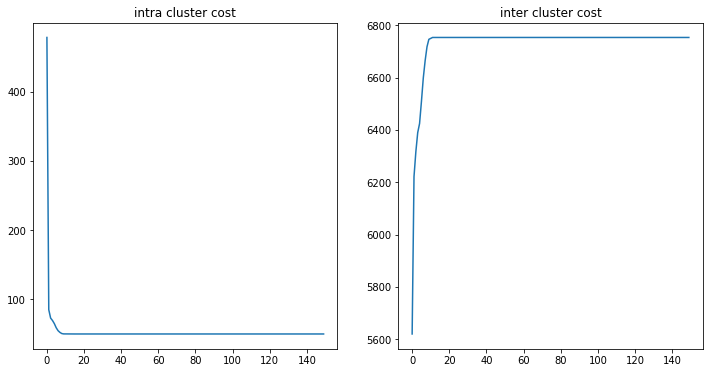

In [4]:
k = 5
model = kmeans(k)
centroids,intra_cost,inter_cost = model.train(iris.data)
fig,axs = plt.subplots(1,2)
fig.set_size_inches(12,6)
axs[0].plot(intra_cost)
axs[0].set_title('intra cluster cost')
axs[1].plot(inter_cost)
axs[1].set_title('inter cluster cost')
print('ratio of inter_intra cost = {}'.format(intra_cost[-1]/inter_cost[-1]))

ratio of inter_intra cost = 0.002846252218868146


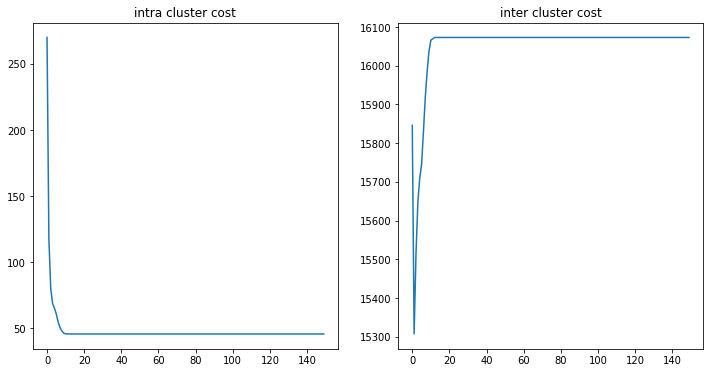

In [5]:
k = 10
model = kmeans(k)
centroids,intra_cost,inter_cost = model.train(iris.data)
fig,axs = plt.subplots(1,2)
fig.set_size_inches(12,6)
axs[0].plot(intra_cost)
axs[0].set_title('intra cluster cost')
axs[1].plot(inter_cost)
axs[1].set_title('inter cluster cost')
print('ratio of inter_intra cost = {}'.format(intra_cost[-1]/inter_cost[-1]))

ratio of inter_intra cost = 0.0012003815776760406


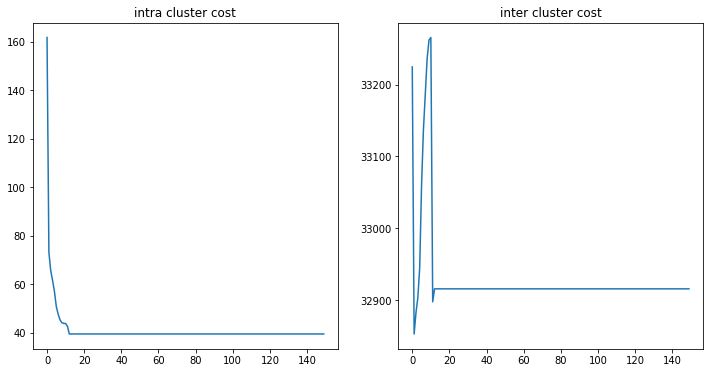

In [6]:
k = 20
model = kmeans(k)
centroids,intra_cost,inter_cost = model.train(iris.data)
fig,axs = plt.subplots(1,2)
fig.set_size_inches(12,6)
axs[0].plot(intra_cost)
axs[0].set_title('intra cluster cost')
axs[1].plot(inter_cost)
axs[1].set_title('inter cluster cost')
print('ratio of inter_intra cost = {}'.format(intra_cost[-1]/inter_cost[-1]))

In [7]:
cost = []
for i in range(100):
  k = 5
  model = kmeans(k)
  centroids,intra_cost,inter_cost = model.train(iris.data,50)
  cost.append(intra_cost[-1])
print('mean of costs was {} '.format(np.mean(cost)))
print('variance of costs was {} '.format(np.var(cost)))


mean of costs was 49.849814510523345 
variance of costs was 2.0194839173657902e-28 


In [8]:
cost = []
for i in range(100):
  k = 10
  model = kmeans(k)
  centroids,intra_cost,inter_cost = model.train(iris.data,50)
  cost.append(intra_cost[-1])
print('mean of costs was {} '.format(np.mean(cost)))
print('variance of costs was {} '.format(np.var(cost)))


mean of costs was 45.74742598238482 
variance of costs was 5.048709793414476e-29 


In [9]:
cost = []
for i in range(100):
  k = 20
  model = kmeans(k)
  centroids,intra_cost,inter_cost = model.train(iris.data,50)
  cost.append(intra_cost[-1])
print('mean of costs was {} '.format(np.mean(cost)))
print('variance of costs was {} '.format(np.var(cost)))


mean of costs was 39.51118750000001 
variance of costs was 5.048709793414476e-29 
